<a href="https://colab.research.google.com/github/HidellaS/TensorflowCNNFunda/blob/main/Image_Classification_with_Tensorflow_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the dataset and unzip
#### We using only 2 classes of the 101 food classification dataset for this sample project

In [47]:
import zipfile

# Download the dataset
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the dataset
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-02-21 06:40:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M  22.7MB/s    in 5.7s    

2025-02-21 06:40:34 (18.4 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]



## Inspect the dataset and understand the data

In [48]:
!ls pizza_steak

test  train


In [49]:
!ls pizza_steak/train/

pizza  steak


In [50]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [51]:
import os

# Walk through the pizza steak directory and list numbenr of files in the dir
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak


## Visualize the data

In [52]:
import pathlib
import numpy as np

# Create a list of class names in sub directories in training folder
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
print(class_names)

['pizza' 'steak']


In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read the image and plot
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape: {img.shape}")

['2793535.jpg']
Image Shape: (512, 512, 3)


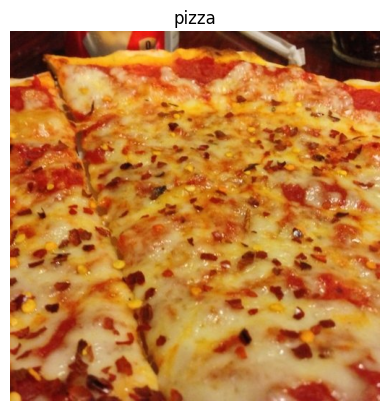

In [54]:
view_random_image(target_dir="pizza_steak/train/",
                  target_class="pizza")

['227576.jpg']
Image Shape: (512, 384, 3)


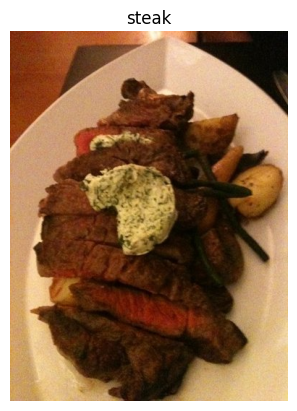

In [55]:
view_random_image(target_dir="pizza_steak/train/",
                  target_class="steak")

# End to end cnn model

In [56]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed
tf.random.set_seed(42)

# Preprocess data (normalization: get all the pixel valeus in between 0 adn 1)
train_dategen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup path to data
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_dategen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                              batch_size = 32,
                                              target_size = (224, 224),
                                              class_mode = "binary",
                                              seed = 42)

2.18.0
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Buid a CNN model by replicating tiny VGG model in cnn explainer

In [57]:
# Model architecture
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = 'valid'),

    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1, activation = 'sigmoid')
])


# Compile the model
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.5297 - loss: 0.7223 - val_accuracy: 0.7700 - val_loss: 0.5334
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.7516 - loss: 0.5215 - val_accuracy: 0.8520 - val_loss: 0.3917
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 149ms/step - accuracy: 0.7899 - loss: 0.4540 - val_accuracy: 0.7060 - val_loss: 0.5749
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.8015 - loss: 0.4427 - val_accuracy: 0.8360 - val_loss: 0.3607
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.8326 - loss: 0.3828 - val_accuracy: 0.8740 - val_loss: 0.3344


In [58]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [59]:
# list all data in history
print(history_1.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


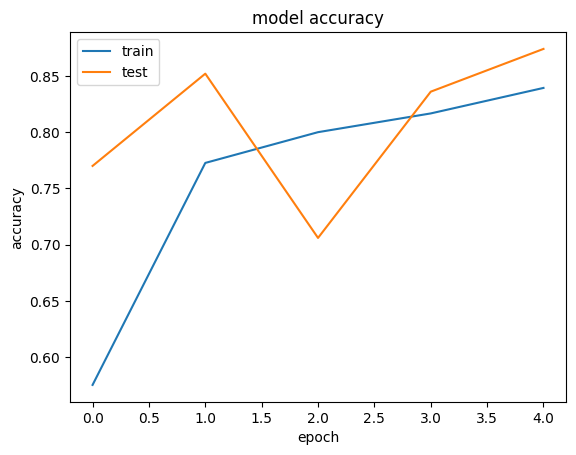

In [60]:
# summarize history for accuracy
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

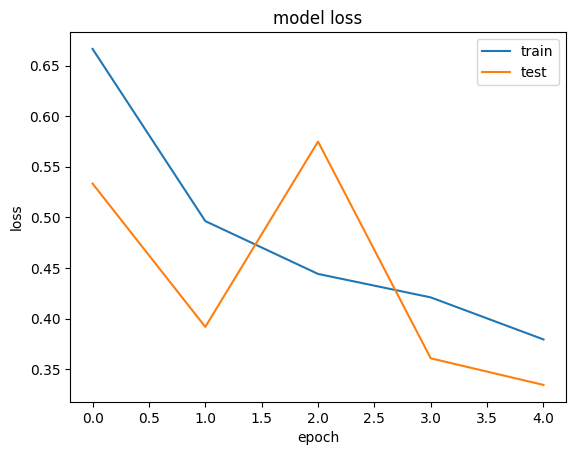

In [61]:
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# New model to beat the base line model

['358042.jpg']
Image Shape: (384, 512, 3)
['3675128.jpg']
Image Shape: (512, 512, 3)


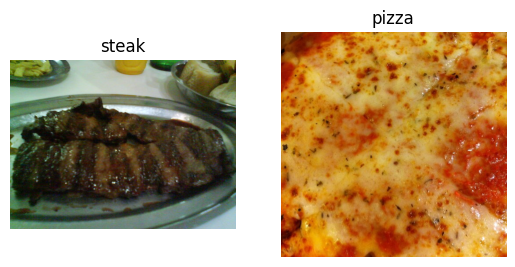

In [62]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## Preprocess the data

In [68]:
!nvidia-smi

Fri Feb 21 06:52:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   74C    P0             32W /   70W |    1690MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [69]:
import tensorflow as tf

# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Create training and testing datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode='binary',
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='binary',
    image_size=(224, 224),
    batch_size=32,
    shuffle=False  # Usually, test data doesn't need shuffling
)

# Apply rescaling (normalization) using a preprocessing layer
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [73]:
# get a sample data
# Use the `take` method to get one batch from the dataset
for images, labels in train_ds.take(1):
    print(len(images), len(labels))


32 32


In [74]:
images[0].shape

TensorShape([224, 224, 3])

In [75]:
images[0]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.08235294, 0.02352941, 0.00392157],
        [0.08235294, 0.02352941, 0.00392157],
        [0.07843138, 0.02745098, 0.00392157],
        ...,
        [0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471]],

       [[0.08235294, 0.02745098, 0.01568628],
        [0.08235294, 0.02745098, 0.01568628],
        [0.08023209, 0.02851141, 0.01568628],
        ...,
        [0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471]],

       [[0.07619048, 0.03053221, 0.02184874],
        [0.07619048, 0.03053221, 0.02184874],
        [0.07450981, 0.03137255, 0.02184874],
        ...,
        [0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471],
        [0.00784314, 0.        , 0.01176471]],

       ...,

       [[0.87142867, 0.8736695 , 0.89579844],
        [0.86

In [76]:
labels

<tf.Tensor: shape=(32, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

## Create the model

In [77]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [81]:
model_2 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape = (224, 224, 3)),

    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
  ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_ds,
                        epochs = 5,
                        steps_per_epoch = len(train_ds),
                        validation_data = test_ds,
                        validation_steps = len(test_ds))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - accuracy: 0.5821 - loss: 0.6686 - val_accuracy: 0.7680 - val_loss: 0.4529
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.7757 - loss: 0.4698 - val_accuracy: 0.7780 - val_loss: 0.4867
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.8429 - loss: 0.3714 - val_accuracy: 0.8340 - val_loss: 0.3544
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9153 - loss: 0.2302 - val_accuracy: 0.8180 - val_loss: 0.3747
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.9619 - loss: 0.1205 - val_accuracy: 0.7820 - val_loss: 0.4633


In [84]:
print(history_2.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


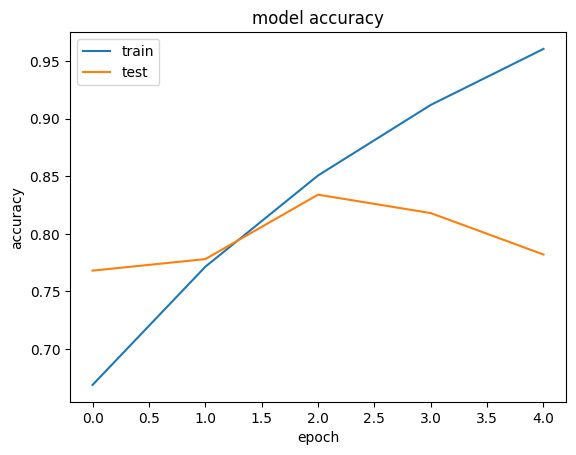

In [85]:
# summarize history for accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

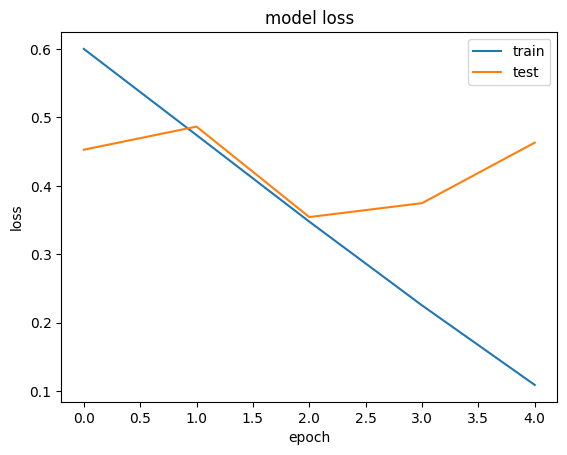

In [88]:
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [99]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

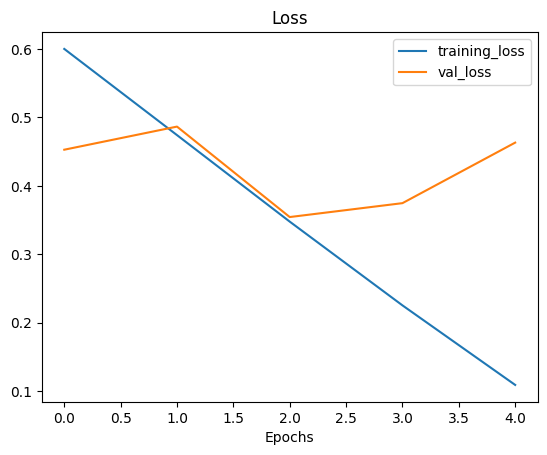

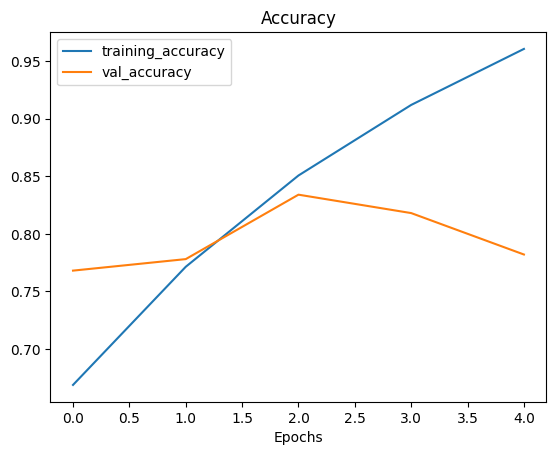

In [98]:
plot_loss_curves(history_2)

In [100]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [101]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [102]:
# Fit the model
history_5 = model_5.fit(train_ds,
                        epochs=5,
                        steps_per_epoch=len(train_ds),
                        validation_data=test_ds,
                        validation_steps=len(test_ds))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.6137 - loss: 0.6406 - val_accuracy: 0.8000 - val_loss: 0.4442
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.7930 - loss: 0.4527 - val_accuracy: 0.8520 - val_loss: 0.3713
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.8428 - loss: 0.3938 - val_accuracy: 0.8720 - val_loss: 0.3202
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.8528 - loss: 0.3661 - val_accuracy: 0.8520 - val_loss: 0.3258
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.8537 - loss: 0.3463 - val_accuracy: 0.8640 - val_loss: 0.3125


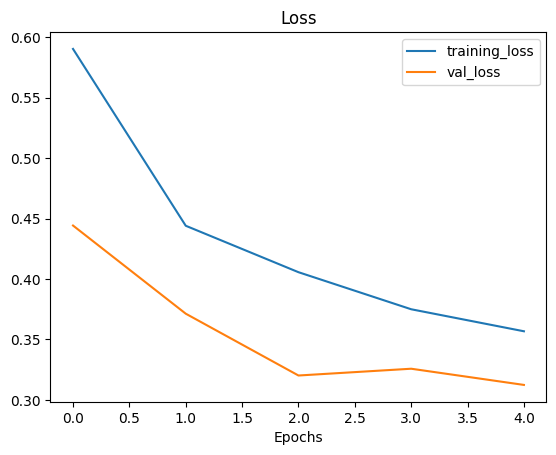

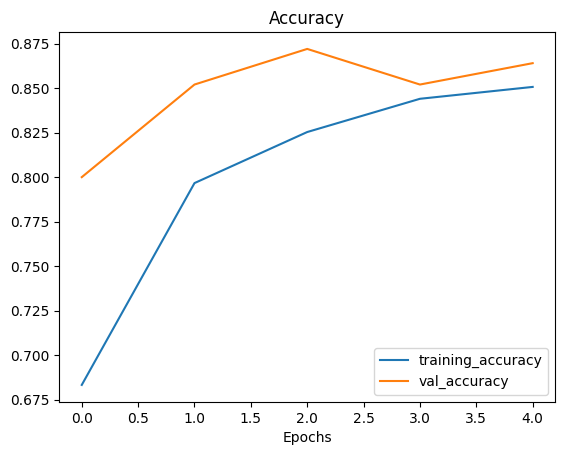

In [105]:
plot_loss_curves(history_5)

# Model with data augmentaion

In [107]:
import tensorflow as tf

# Define directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Create datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode='binary',
    image_size=(224, 224),
    batch_size=32,
    shuffle=True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='binary',
    image_size=(224, 224),
    batch_size=32,
    shuffle=False
)


normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


# Define augmentation layers
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.055),       # ~20 degrees (20/360 ≈ 0.055)
    tf.keras.layers.RandomTranslation(0.2, 0.2),   # width and height shifts (20% of the image)
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomFlip("horizontal")
])

# Option 1: Apply augmentation as part of the dataset pipeline
augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


<ipython-input-109-dda568cf014f>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Label: {int(labels[i].numpy())}")


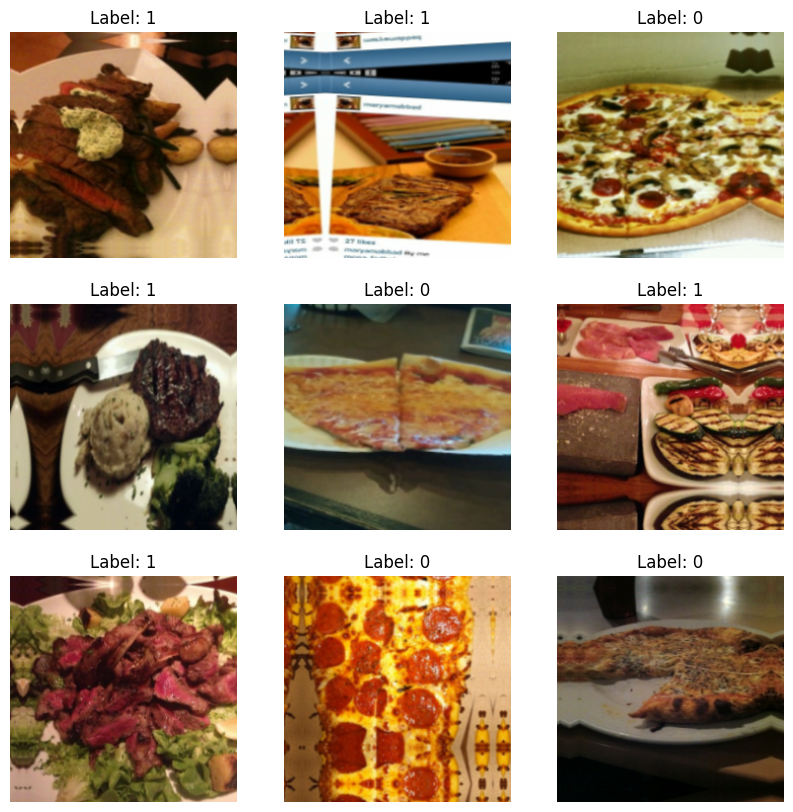

In [109]:
import matplotlib.pyplot as plt

# Fetch one batch from augmented_train_ds
for images, labels in augmented_train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display 9 images from the batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(f"Label: {int(labels[i].numpy())}")
        plt.axis("off")
    plt.show()


In [110]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(augmented_train_ds, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(augmented_train_ds),
                        validation_data=test_ds,
                        validation_steps=len(test_ds))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 31s 610ms/step - accuracy: 0.5951 - loss: 0.6684 - val_accuracy: 0.8020 - val_loss: 0.5052
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 521ms/step - accuracy: 0.7556 - loss: 0.5410 - val_accuracy: 0.8120 - val_loss: 0.4149
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 519ms/step - accuracy: 0.7687 - loss: 0.5032 - val_accuracy: 0.8040 - val_loss: 0.4295
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 546ms/step - accuracy: 0.7739 - loss: 0.4893 - val_accuracy: 0.8500 - val_loss: 0.3686
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 523ms/step - accuracy: 0.7920 - loss: 0.4676 - val_accuracy: 0.8520 - val_loss: 0.3658


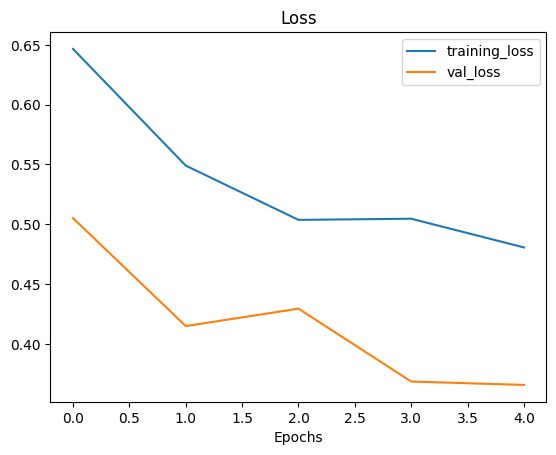

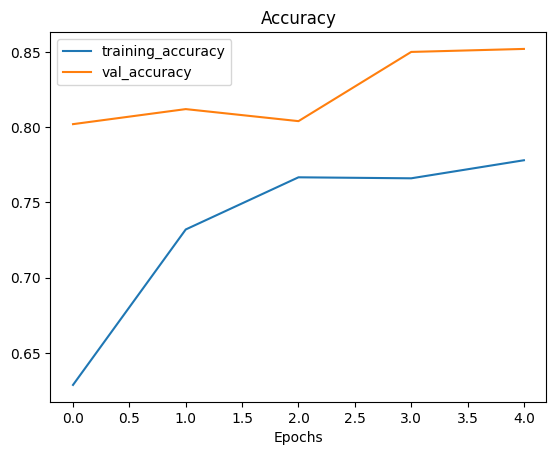

In [112]:
plot_loss_curves(history_6)

## Make a prediciton on our custom data

In [140]:
steak = mpimg.imread('custom_steak_img.jpeg')
pizza = mpimg.imread('custom_pizza_img.png')

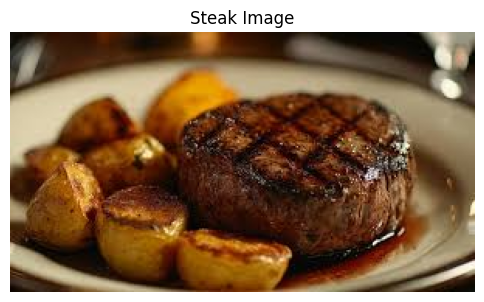

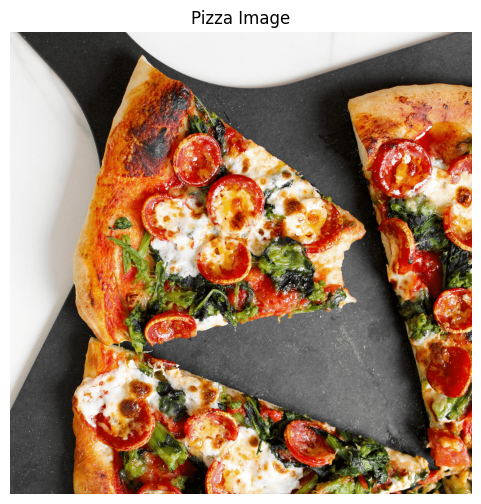

In [141]:
# Plot the steak image
plt.figure(figsize=(6, 6))
plt.imshow(steak)
plt.title("Steak Image")
plt.axis("off")
plt.show()

# Plot the pizza image
plt.figure(figsize=(6, 6))
plt.imshow(pizza)
plt.title("Pizza Image")
plt.axis("off")
plt.show()

In [142]:
steak.shape

(168, 300, 3)

In [143]:
pizza.shape

(1200, 1200, 4)

In [144]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [145]:
steak = load_and_prep_image("custom_steak_img.jpeg")
pizza = load_and_prep_image('custom_pizza_img.png')

In [146]:
steak.shape

TensorShape([224, 224, 3])

In [147]:
pizza.shape

TensorShape([224, 224, 3])

In [148]:
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.05556722, 0.04380252, 0.01635154],
         [0.06281512, 0.05105042, 0.02359944],
         [0.069993  , 0.05822829, 0.03077731],
         ...,
         [0.5731443 , 0.58098745, 0.4986345 ],
         [0.57839644, 0.5862396 , 0.50388664],
         [0.5803922 , 0.5882353 , 0.5058824 ]],

        [[0.0600534 , 0.04828869, 0.02083771],
         [0.06401873, 0.05225402, 0.02480305],
         [0.06791405, 0.05614933, 0.02869835],
         ...,
         [0.58012515, 0.5879683 , 0.50561535],
         [0.5820947 , 0.58993787, 0.5075849 ],
         [0.580808  , 0.5886511 , 0.5062982 ]],

        [[0.0654368 , 0.05367209, 0.02622111],
         [0.06471463, 0.05294993, 0.02549895],
         [0.06394871, 0.052184  , 0.02473302],
         ...,
         [0.5914435 , 0.59487486, 0.5139925 ],
         [0.5887517 , 0.59218305, 0.51130074],
         [0.5839986 , 0.58743   , 0.50654763]],

        ...,

        [[0.04944415, 0.01267945, 

In [149]:
print(f"Shape before new dimension: {pizza.shape}")
pizza = tf.expand_dims(pizza, axis=0) # add an extra dimension at axis 0
print(f"Shape after new dimension: {pizza.shape}")
pizza

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.9146659 , 0.9146659 , 0.9107443 ],
         [0.8692677 , 0.8692677 , 0.86534613],
         [0.83137256, 0.827451  , 0.8156863 ],
         ...,
         [0.30143636, 0.30143636, 0.30039084],
         [0.3346651 , 0.3346651 , 0.33261445],
         [0.37076238, 0.37076238, 0.37018707]],

        [[0.91961783, 0.91961783, 0.91569626],
         [0.90389156, 0.90389156, 0.89997   ],
         [0.8666667 , 0.8666667 , 0.8627451 ],
         ...,
         [0.35444722, 0.35444722, 0.35282162],
         [0.32748687, 0.32748687, 0.32441077],
         [0.35450736, 0.35450736, 0.3527817 ]],

        [[0.9043117 , 0.9043117 , 0.90039015],
         [0.92156863, 0.92156863, 0.91764706],
         [0.87266904, 0.87266904, 0.8687475 ],
         ...,
         [0.33381546, 0.33381546, 0.3306893 ],
         [0.4062677 , 0.4062677 , 0.4062677 ],
         [0.4023404 , 0.4023404 , 0.4023404 ]],

        ...,

        [[0.27138367, 0.27138367, 

In [154]:
# Make a prediction on custom image tensor
pred1 = model_6.predict(steak)
pred1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.7613933]], dtype=float32)

In [155]:
pred2 = model_6.predict(pizza)
pred2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.29937527]], dtype=float32)

In [156]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [157]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred1)[0][0])]
pred_class

'steak'

In [158]:
pred_class = class_names[int(tf.round(pred2)[0][0])]
pred_class

'pizza'

In [159]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


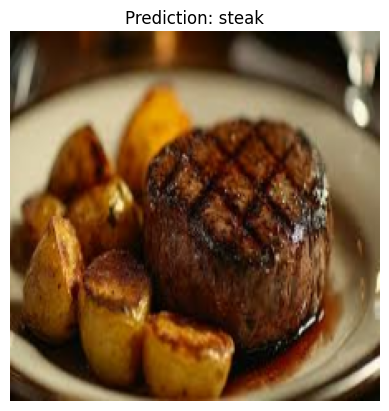

In [160]:
# Test our model on a custom image
pred_and_plot(model_6, "custom_steak_img.jpeg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


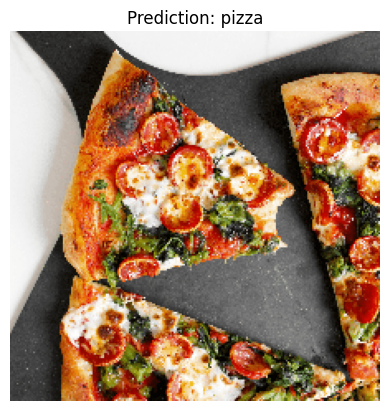

In [162]:
pred_and_plot(model_6, "custom_pizza_img.png", class_names)